# Bag of Words Implementation

In [37]:
from preprocess_email import ham_df,spam_df, combined_df
import nltk
import numpy as np
import seaborn as sns
import pandas as pd

In [38]:
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))



nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



import string

def process_text(content):
    filtered_list = []
    remove_punc = []
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        remove_punc = [word for word in content if word not in string.punctuation] # remove punctuation
    
    content = remove_punc
    
    # remove_punc.clear()
    
    # for word in content:
    #     if word.casefold() not in stop_words:
    #         filtered_list.append(word)

    lemmatized_words = [lemmatizer.lemmatize(word) for word in content]
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]
    # # stemmed_words = [stemmer.stem(word) for word in filtered_list]
    # content.clear()
    # remove_punc.clear()
    
    return ' '.join(lemmatized_words)
    # return ' '.join(filtered_list)
    # return ' '.join(content)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
combined_df['processed_text'] = combined_df['Main_Content'].apply(process_text)

In [170]:
combined_df

,Main_Content,Label,processed_text
0,From Date Wed 21 Aug 2002 023656 0400 Exmh7785...,0,from date wed 21 aug 2002 023656 0400 exmh7785...
1,From Robert Elz Date Wed 21 Aug 2002 150107 07...,0,from robert elz date wed 21 aug 2002 150107 07...
2,OuchIll get right on it From Robert Elz Date W...,0,ouchill get right on it from robert elz date w...
3,On Wed 21 Aug 2002 150107 0700 Robert Elz said...,0,on wed 21 aug 2002 150107 0700 robert elz said...
4,From Chris Garrigues Date Wed 21 Aug 2002 1017...,0,from chris garrigues date wed 21 aug 2002 1017...
...,...,...,...
2455,Long time no chatHow have you been If youve be...,1,long time no chathow have you been if youve be...
2456,Below is the result of your feedback form It w...,1,below is the result of your feedback form it w...
2457,When Americas top companies compete for your b...,1,when america top company compete for your busi...
2458,Want to watch HARDCORE PORN MOVIES Our site is...,1,want to watch hardcore porn movie our site is ...


In [40]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [41]:
from sklearn.model_selection import train_test_split

X = combined_df['processed_text'].astype(str)
X_BOW = vectorizer.fit_transform(X)
labels = combined_df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X_BOW, labels, test_size=0.2, random_state=50)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create and fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred = logistic_model.predict(X_test)
# Evaluate model
LR_accuracy = accuracy_score(y_test, y_pred)
LR_precision = precision_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)

Accuracy: 0.975609756097561
Precision: 0.9906976744186047


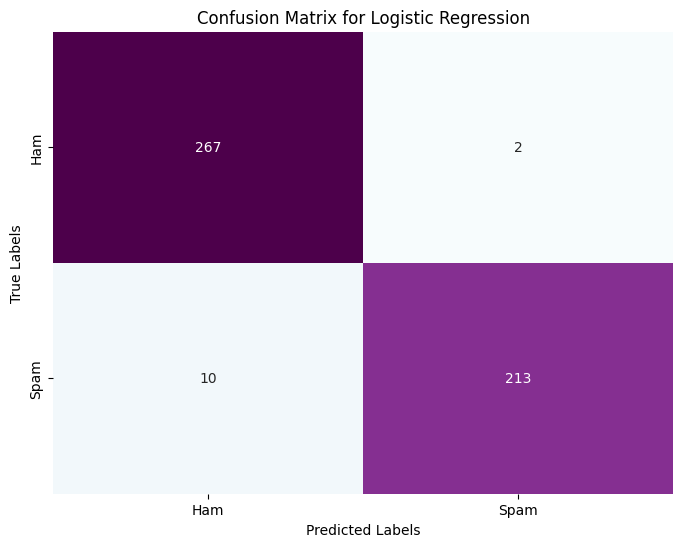

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()


In [44]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on test data
y_pred = NB_model.predict(X_test)
# Evaluate model
NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred)
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)

Accuracy: 0.9817073170731707
Precision: 0.9863636363636363


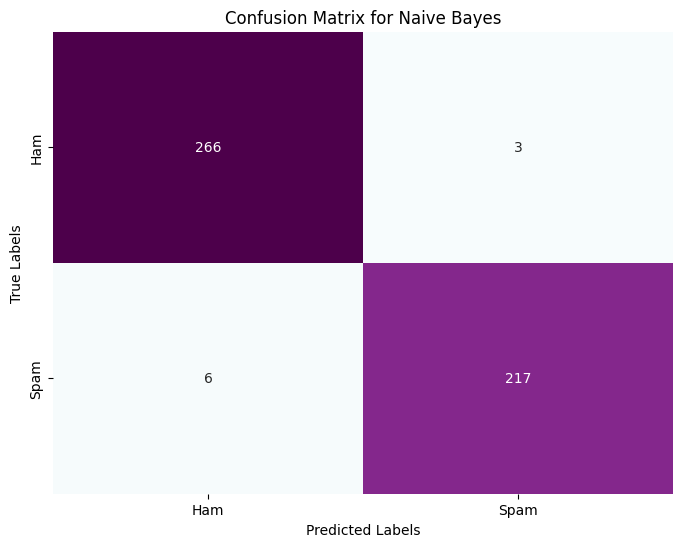

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])  


plt.show()

In [46]:
from sklearn.svm import SVC

num_features = X_train.shape[1]
SVM = SVC()
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)

Accuracy: 0.9227642276422764
Precision: 0.9792746113989638


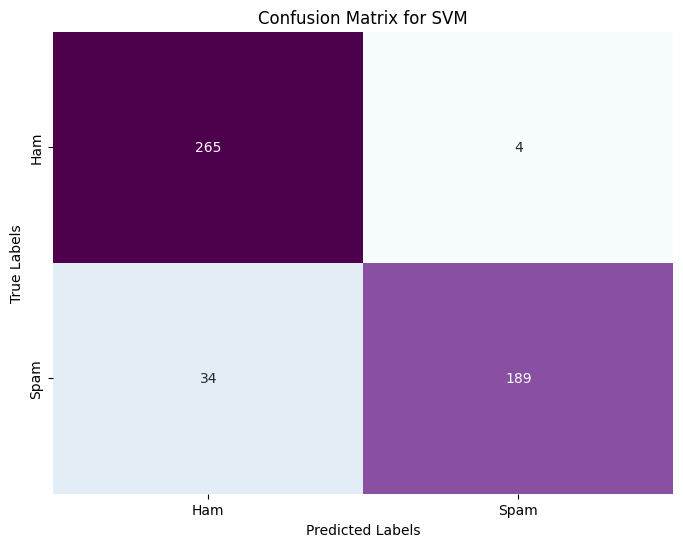

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [137]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 41)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

DT_accuracy = accuracy_score(y_test, y_pred)
DT_precision = precision_score(y_test, y_pred)
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)

Accuracy: 0.9329268292682927
Precision: 0.9357798165137615


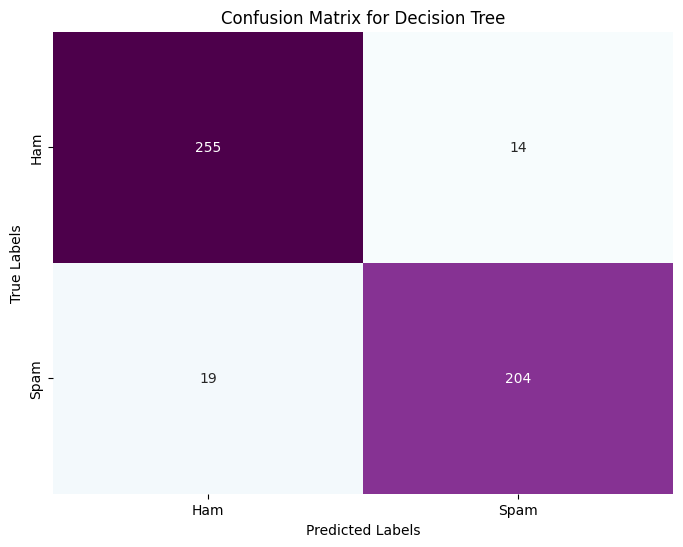

In [138]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [159]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred)
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)

Accuracy: 0.8760162601626016
Precision: 0.8375


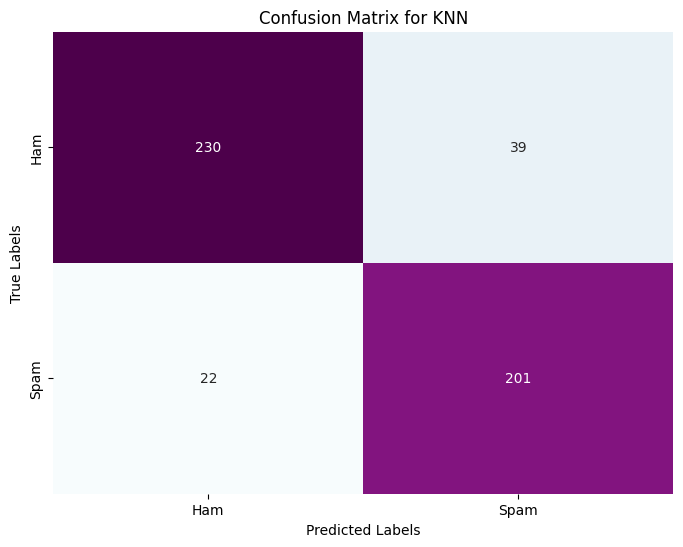

In [160]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

In [164]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 300, random_state = 2 )
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)

Accuracy: 0.9857723577235772
Precision: 0.990909090909091


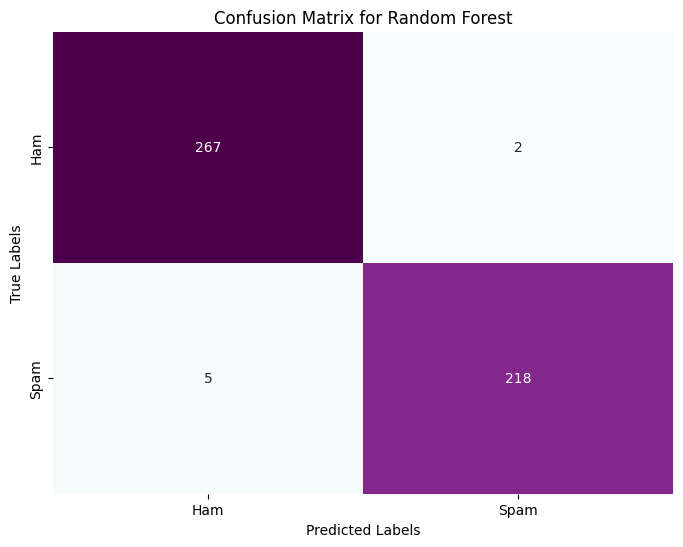

In [165]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="BuPu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')

plt.xticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0.5, 1.5], labels=['Ham', 'Spam'])


plt.show()

# Comparison Between Models

In [166]:
model_table = [
    {'Model': 'Logistic Regression', 'Accuracy': LR_accuracy, 'Precision': LR_precision},
    {'Model': 'Naive Bayes', 'Accuracy': NB_accuracy, 'Precision': NB_precision},
    {'Model': 'SVM', 'Accuracy': SVM_accuracy, 'Precision': SVM_precision},
    {'Model': 'Decision Tree', 'Accuracy': DT_accuracy, 'Precision': DT_precision},
    {'Model': 'KNN', 'Accuracy': KNN_accuracy, 'Precision': KNN_precision},
    {'Model': 'Random Forest', 'Accuracy': RF_accuracy, 'Precision': RF_precision},
]

# Convert the data to a DataFrame
df = pd.DataFrame(model_table)


# Sort the DataFrame by both Accuracy and Precision scores
sorted_df = df.sort_values(by=['Accuracy', 'Precision'], ascending=[False, False])
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.index = range(1, len(df) + 1)
sorted_df


,Model,Accuracy,Precision
1,Random Forest,0.985772,0.990909
2,Naive Bayes,0.981707,0.986364
3,Logistic Regression,0.975610,0.990698
4,Decision Tree,0.932927,0.935780
5,SVM,0.922764,0.979275
6,KNN,0.876016,0.837500


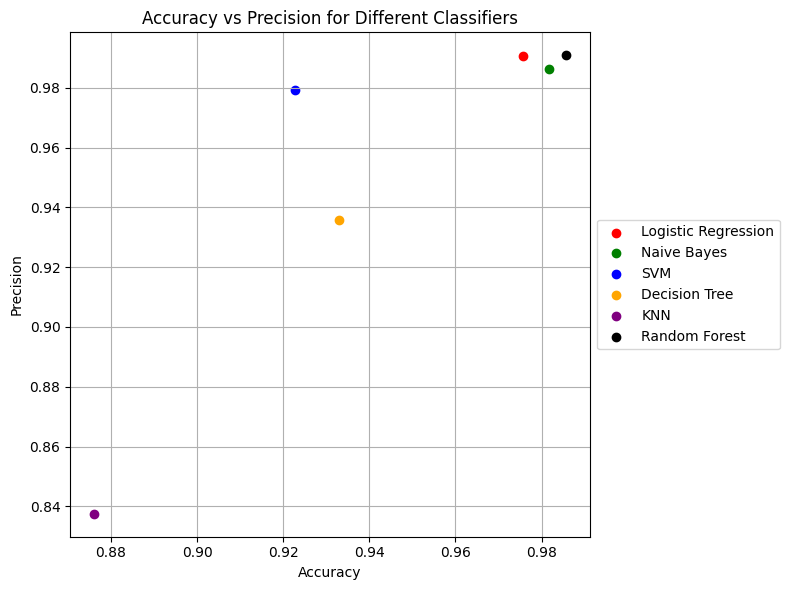

In [167]:
import matplotlib.pyplot as plt

# Extract accuracy and precision values
accuracy_values = df['Accuracy']
precision_values = df['Precision']
model_names = df['Model']


model_colors = {
    'Logistic Regression': 'red',
    'SVM': 'blue',
    'Naive Bayes': 'green',
    'Decision Tree': 'orange',
    'KNN': 'purple',
    'Random Forest': 'black'
}

# Create scatter plot with color coding based on model names
plt.figure(figsize=(8, 6))
for idx, model in enumerate(model_names):
    acc = accuracy_values[idx]
    prec = precision_values[idx]
    color = model_colors.get(model)
    plt.scatter(acc, prec, color=color, label=model)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.title('Accuracy vs Precision for Different Classifiers')

# Create legend on the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Save Model and Vectorizer

In [169]:
#save model using joblib
import joblib

joblib.dump(RF, 'BOW_RF.pkl')
joblib.dump(logistic_model, 'BOW_LR.pkl')
joblib.dump(NB_model, 'BOW_NB.pkl')
joblib.dump(vectorizer, 'BOW_vectorizer.pkl')

['BOW_vectorizer.pkl']